## Penguin Species Classification using KNN-algorithm

import all related library for data analysis and visualization  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

read file from computer directory

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DATA SCIENCE PROJECT\\Project\\Penguin\\penguin_type.csv")

Check the datatypes for all columns. Which we can see all dataype is already in desired format.

In [3]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Check the null value inside the dataset

In [4]:
print(df.isna().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


I only drop null dataset for sex because for other parameter we can take the average value for its species.However after dropping the null value for the 'sex' the null value on other row also has been drop so there is no need to replace its value.

In [5]:
df= df.dropna(subset=['sex'])


In [6]:
print(df.isna().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


- Check if there is misspell for species and sex column. There is a data that was wrongly key in inside sex column which has '.'.
- After checking only 1 row was wrongly keyed in. so proceed to drop the column.

In [7]:
print(df["species"].unique()) 
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['MALE' 'FEMALE' '.']


In [8]:
df['contains_dot'] = df['sex'].str.contains(r'\.', regex=True)

rows_with_dot = df[df['contains_dot']]
print(rows_with_dot)

    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  contains_dot  
336       4875.0   .          True  


In [9]:
df=df[df['sex']!='.'].reset_index()

In [10]:
print(df.describe())

            index  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count  333.000000        333.000000       333.000000         333.000000   
mean   172.303303         43.992793        17.164865         200.966967   
std     97.346548          5.468668         1.969235          14.015765   
min      0.000000         32.100000        13.100000         172.000000   
25%     89.000000         39.500000        15.600000         190.000000   
50%    172.000000         44.500000        17.300000         197.000000   
75%    256.000000         48.600000        18.700000         213.000000   
max    343.000000         59.600000        21.500000         231.000000   

       body_mass_g  
count   333.000000  
mean   4207.057057  
std     805.215802  
min    2700.000000  
25%    3550.000000  
50%    4050.000000  
75%    4775.000000  
max    6300.000000  


In [11]:
df=df.drop("contains_dot",axis='columns')
print(df.head()) 

   index species     island  culmen_length_mm  culmen_depth_mm  \
0      0  Adelie  Torgersen              39.1             18.7   
1      1  Adelie  Torgersen              39.5             17.4   
2      2  Adelie  Torgersen              40.3             18.0   
3      4  Adelie  Torgersen              36.7             19.3   
4      5  Adelie  Torgersen              39.3             20.6   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
3              193.0       3450.0  FEMALE  
4              190.0       3650.0    MALE  


## EDA Analysis

Based on the Pie Chart below we can see that from this dataset the highest penguin species is Adelie followed by Gentoo and Chinstrap.

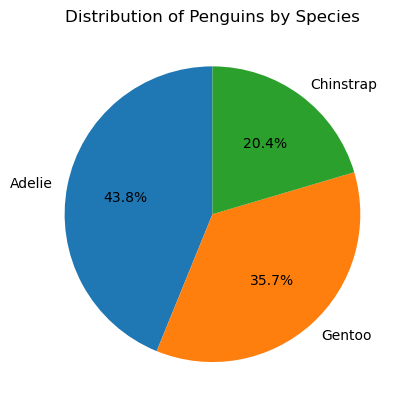

In [12]:
species_counts = df['species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Penguins by Species')

plt.show()


Based on the by chart the Gender of the penguin is nearly equivelant which is 50.5% male and 49.5% female.

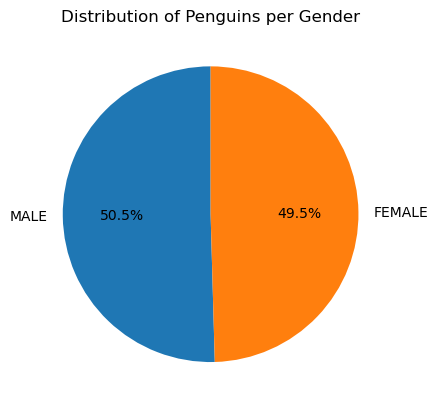

In [13]:
gender_count = df['sex'].value_counts()

plt.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%',startangle=90)
plt.title("Distribution of Penguins per Gender")

plt.show()

Based on the Pie Chart below we can see that the majority of the penguins in this dataset are from Biscoe, followed by Torgersen and Dream.

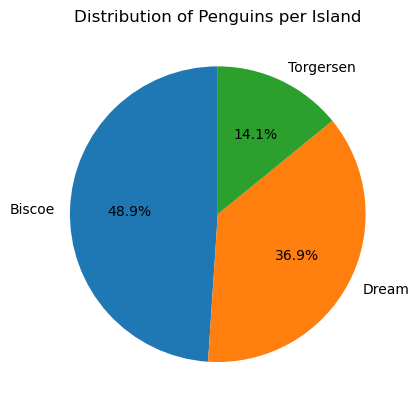

In [14]:
island_count = df['island'].value_counts()
plt.pie(island_count, labels = island_count.index, autopct = '%1.1f%%',startangle=90)
plt.title("Distribution of Penguins per Island")
plt.show()

Based on the bar chart below we can see that only Adelie spesies occuppy all three of the island. While Chinstrap only occupy Dream Island and Gentoo only occupy Torgersen Island.

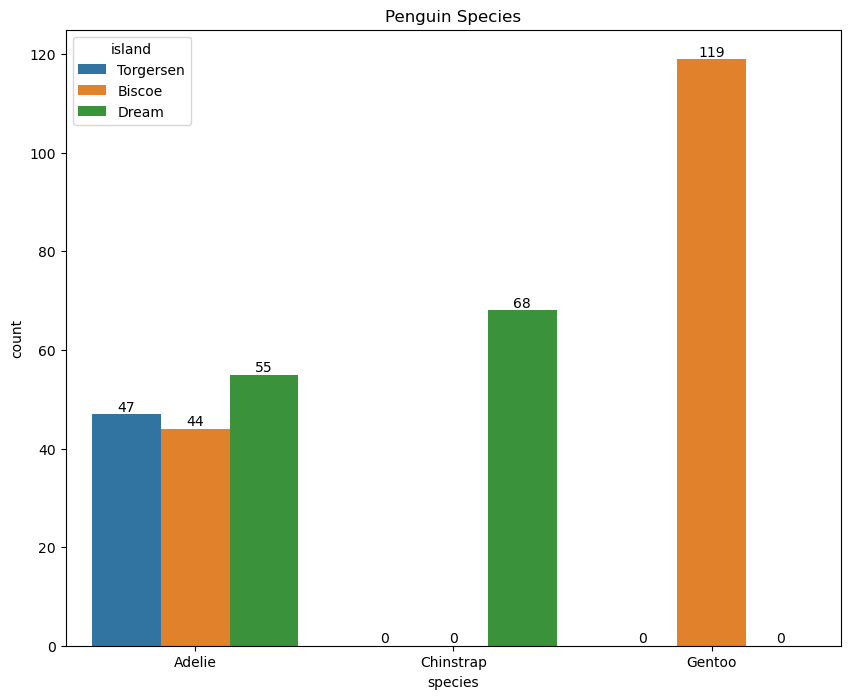

In [15]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x="species", hue='island') 
for container in ax.containers:
    ax.bar_label(container)
ax.set(title="Penguin Species") 
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

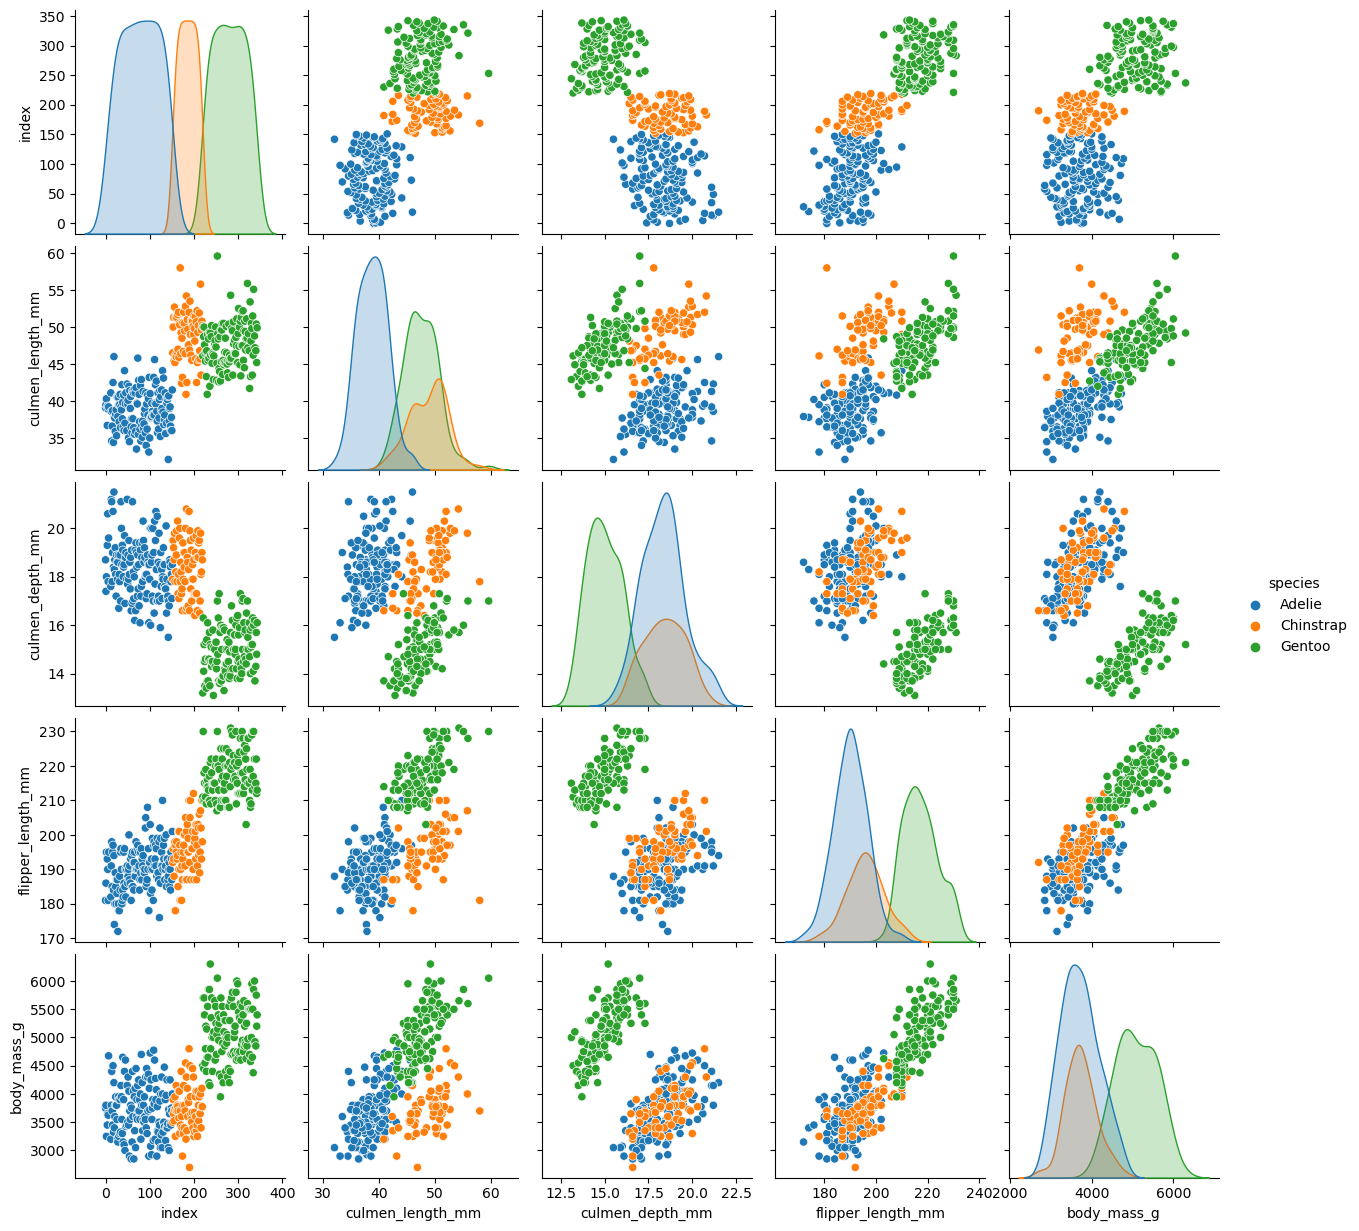

In [16]:
sns.pairplot(df, hue = 'species')

Based on all the categorical plot below we can see that although the Adelie species have lived on diffrent Island but all the variables of the species are within the same range for all of the three island.
- For the Culmen length(mm) for Gento and Chinstrap have a similar range while Adelie differs from the two.
- For the Culmen depth(mm),Flipper (mm) and body mass(g)  for Adelie and Chinstrap have a similar range while Gentoo differs from the two.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


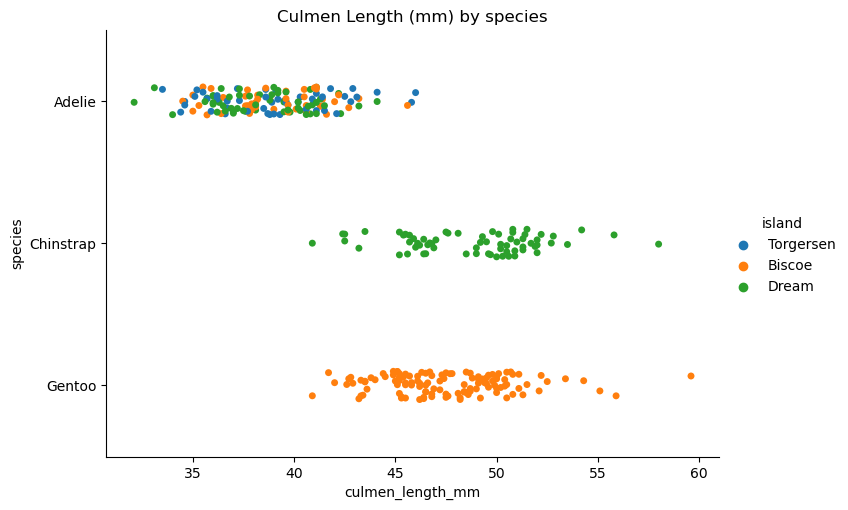

In [17]:
ax_scatter = sns.catplot(data=df, x="culmen_length_mm", y="species", hue="island", height=5, aspect=1.5)
ax_scatter.set(title="Culmen Length (mm) by species")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


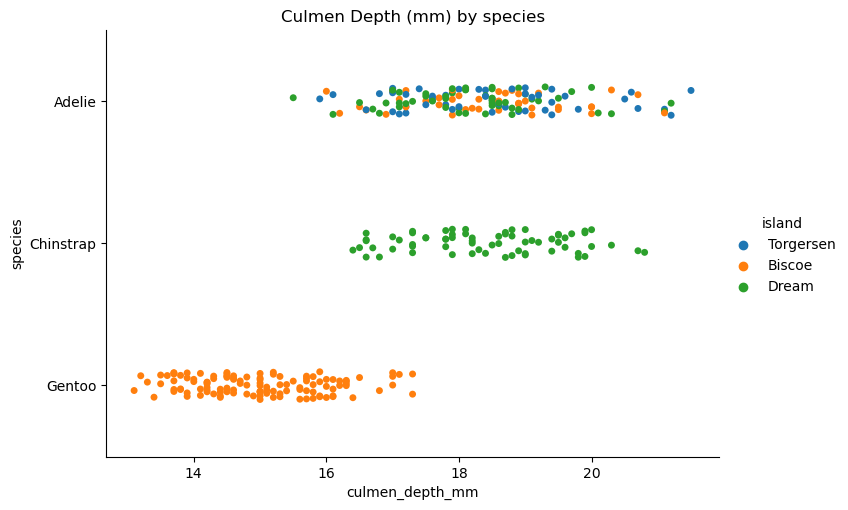

In [18]:
ax_scatter = sns.catplot(data=df, x="culmen_depth_mm", y="species", hue="island", height=5, aspect=1.5)
ax_scatter.set(title="Culmen Depth (mm) by species")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


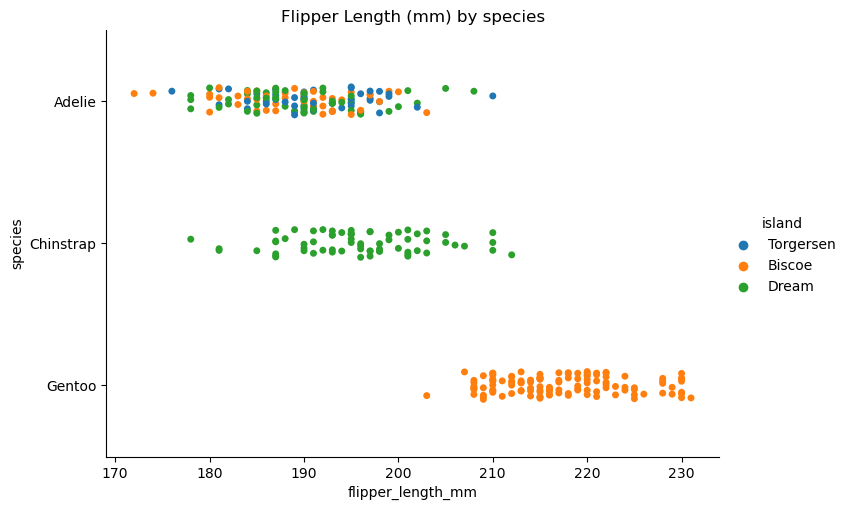

In [19]:
ax_scatter = sns.catplot(data=df, x="flipper_length_mm", y="species", hue="island", height=5, aspect=1.5)
ax_scatter.set(title="Flipper Length (mm) by species")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


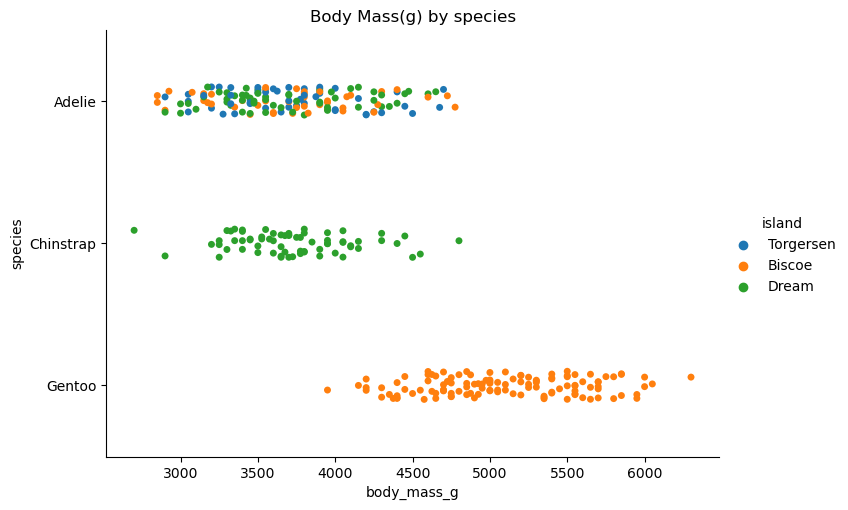

In [20]:
ax_scatter = sns.catplot(data=df, x="body_mass_g", y="species", hue="island", height=5, aspect=1.5)
ax_scatter.set(title="Body Mass(g) by species")
plt.show()

Import all the library for machine learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

- Than we seperated the independent variable and the outcome variable into two dataframe X (independent variable) and y (outcome variable).
- We will use a train test split library from SKlearn to split the data into a test and train dataset which consist of 20% data for test and 80% data for training.

In [22]:
x=df[['culmen_depth_mm','culmen_length_mm','flipper_length_mm','body_mass_g']]
y=df[['species']]
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0, test_size=0.2)

- Firstly i try to to train the model by using 2 number of neighbours as the K value.
- The accuracy that we get from this was quite low which is 79%

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7910447761194029


D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


from the classification report we can see that this model have predicted Chrinstrap have 0% off accurate prediction. While Adelie has f-1 Score of 86% and Gentoo is 89%. This may also be affected due to lowest amount of data from the Chinstrap species.

In [24]:
y_expect=y_test

print(classification_report(y_expect,y_pred))


              precision    recall  f1-score   support

      Adelie       0.79      0.95      0.86        39
   Chinstrap       0.00      0.00      0.00        10
      Gentoo       0.89      0.89      0.89        18

    accuracy                           0.79        67
   macro avg       0.56      0.61      0.58        67
weighted avg       0.70      0.79      0.74        67



- Next we will try to search for the best K values for this models by using below fucntion.
- Based on below data the best K-value is 1 which can get 85% accuracy.

k_values = [i for i in range (1,20)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()



In [26]:
best_k_index = np.argmax(scores)
best_k = k_values[best_k_index]
best_score = scores[best_k_index]

print(f"The best k value is {best_k} with an accuracy score of {best_score:.4f}")

The best k value is 1 with an accuracy score of 0.8502


- So after testing the range of K from 1-20 we get that the best value is 1 so will proceed with 1 as the constant.
- Based on the Classification report below we can still see that the Chinstrap still has the lowest f1-score which is 50% despite getting the overall accurac off 86.5% for overall guess.
- The next step will done was try to standardize the variable 

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8656716417910447


D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
y_expect=y_test

print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

      Adelie       0.88      0.92      0.90        39
   Chinstrap       0.67      0.40      0.50        10
      Gentoo       0.90      1.00      0.95        18

    accuracy                           0.87        67
   macro avg       0.81      0.77      0.78        67
weighted avg       0.85      0.87      0.85        67



For normalizing the data we will fit in the x_train only. and will transform both X_train and X_test.
- This is to ensure that the test data does not influnece the scalling parameter. SO that it can perform well during testing but cannot perform well when using unseen data.
- By fitting only training dataset,we can simulate real-world scenario where the model has never seen the test data.

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(x_train)
X_train_scaled=scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


- Firstly i try to to train the model by using 2 number of neighbours as the K value.
- The accuracy that we get from this was quite low which is 97% which already high compared to previous model.
- But, we will still search for the best K value using below function and as per result the best K value is 3.

In [39]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9701492537313433


D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
X_Scaled= scaler.transform(x)

D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

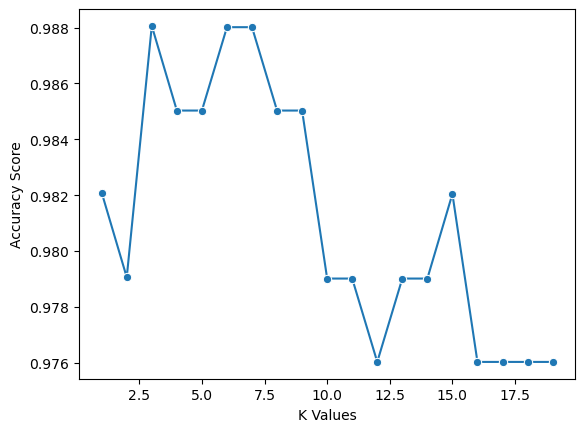

In [41]:
k_values = [i for i in range (1,20)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_Scaled, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

- So after testing the range of K from 1-20 we get that the best value is 3 so will proceed with 3 as the constant.
- Based on the Classification report below we can still see that the Chinstrap still have the lowest f1-score which is 90% this may be caused by the low amount of test data. Which only 1 mistake can take to 10% off error.

In [42]:
best_k_index = np.argmax(scores)
best_k = k_values[best_k_index]
best_score = scores[best_k_index]

print(f"The best k value is {best_k} with an accuracy score of {best_score:.4f}")

The best k value is 3 with an accuracy score of 0.9881


In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9850746268656716


D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
y_expect=y_test

print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        39
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

